TASK 1

1.1 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
df1 = data.sample(n=300000, random_state=1)

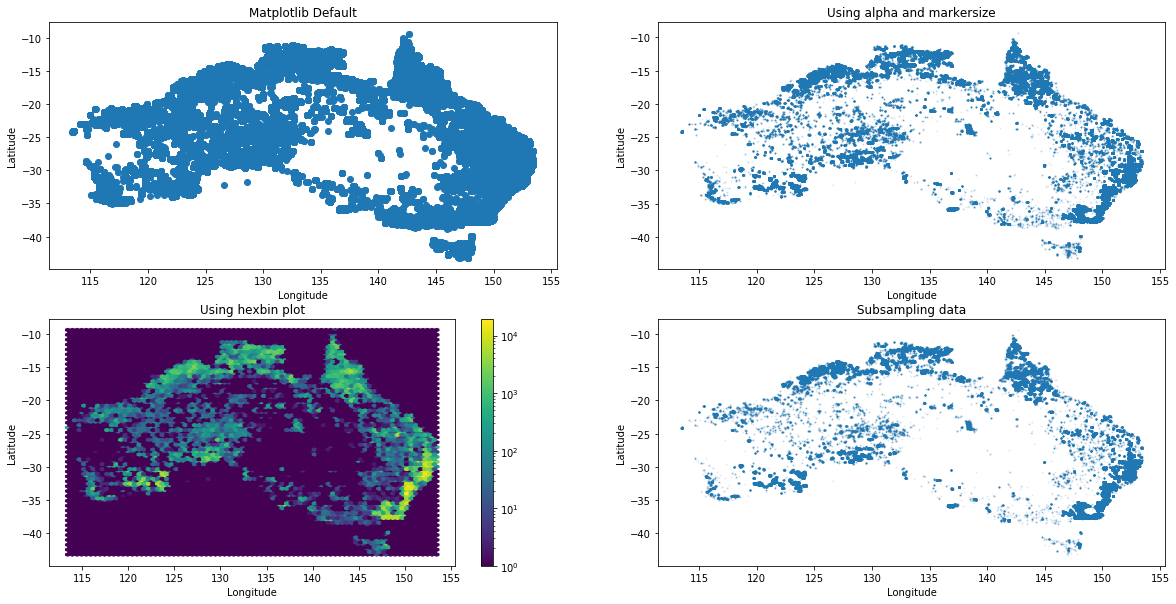

In [2]:
fig, ax1 = plt.subplots(2,2, figsize=(20,10))
ax1[0,0].scatter(x=data['longitude'], y=data['latitude'])
ax1[0,1].scatter(x=data['longitude'], y=data['latitude'],alpha=0.1,s=1)
var1 = ax1[1,0].hexbin(x=data['longitude'], y=data['latitude'], gridsize=80, bins='log')
ax1[1,1].scatter(x=df1['longitude'], y=df1['latitude'],alpha=0.1,s=1)

#Labeling x and y axes
for a in ax1.flat:
    a.set(xlabel = 'Longitude', ylabel = 'Latitude')
    
#Title for the plots
ax1[0,0].set_title('Matplotlib Default')
ax1[0,1].set_title('Using alpha and markersize')
ax1[1,0].set_title('Using hexbin plot')
ax1[1,1].set_title('Subsampling data')

plt.colorbar(var1, ax=ax1[1, 0])


The fires have affected most of the country with particularly high density in the south eastern part and some northern parts of the country. These areas seem to be worst hit with the fires and high temperatures. The central area is less affected when compared to the rest of the country.   

TASK 2

We are certain of a fire if the value of temperature I-4 is saturated as visible from histogram. The histogram is as follows: 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Brightness Temperature'),
 Text(0.5, 1.0, 'Brightness Temperature I-4 distribution')]

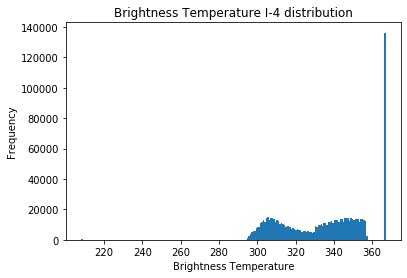

In [3]:
plt.hist(data['bright_ti4'], bins = "auto")
plt.gca().set(title='Brightness Temperature I-4 distribution', ylabel='Frequency', xlabel = 'Brightness Temperature')


Visibly, it can be seen from the histogram that there are points with the highest frequency after the brightness temperature value of around 360. These points attain the highest brightness temperature and can be said to be those that are 'saturated' and believed to cause the fires.
From the documentation of the data, we can also see that those brightness temperatures that correspond to 'high' confidence values are saturated. On plotting the histogram differentiated by the three classes of confidence, we see the following

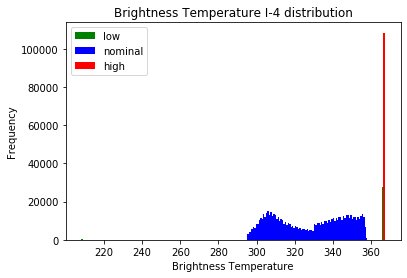

In [4]:
x1 = data.loc[data.confidence=='l', 'bright_ti4']
x2 = data.loc[data.confidence=='n', 'bright_ti4']
x3 = data.loc[data.confidence=='h', 'bright_ti4']
kwargs = dict(alpha=1, bins="auto")
plt.hist(x1, **kwargs, color='g', label='low')
plt.hist(x2, **kwargs, color='b', label='nominal')
plt.hist(x3, **kwargs, color='r', label='high')
plt.gca().set(title='Brightness Temperature I-4 distribution', ylabel='Frequency', xlabel = 'Brightness Temperature')
# plt.xlim(min(data['bright_ti4']),max(data['bright_ti4']))
plt.legend();
# min(data['bright_ti4'])

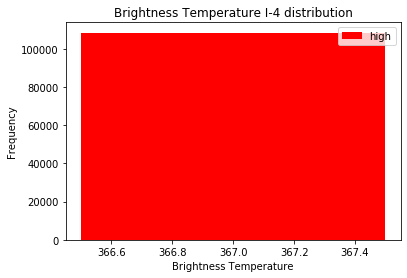

In [5]:
plt.hist(x3, **kwargs, color='r', label='high')
plt.gca().set(title='Brightness Temperature I-4 distribution', ylabel='Frequency', xlabel = 'Brightness Temperature')
plt.legend();

2.1

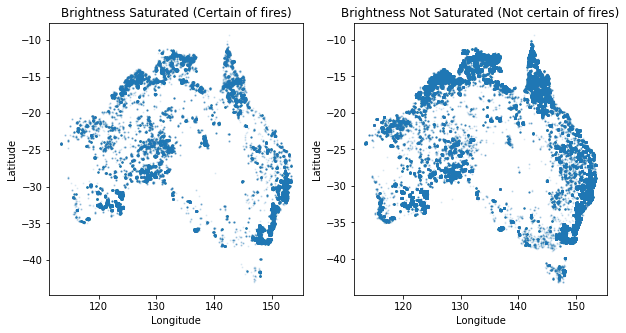

In [6]:
sat = data.loc[data.bright_ti4 >= 360]
nsat = data.loc[data.bright_ti4 < 360]
fig1, ax2 = plt.subplots(1,2, figsize=(10,5))
ax2[0].scatter(x=sat['longitude'], y=sat['latitude'], alpha = 0.1, s = 1)
ax2[1].scatter(x=nsat['longitude'], y=nsat['latitude'], alpha = 0.1, s = 1)

#Title for the plots
ax2[0].set_title('Brightness Saturated (Certain of fires)')
ax2[1].set_title('Brightness Not Saturated (Not certain of fires)')

for a in ax2.flat:
    a.set(xlabel = 'Longitude', ylabel = 'Latitude')
    

Both the plots look similar. There are some locations (lat-long pairs) that are present in both the plots. These might be those locations that saw fires at one point of time and no fires during some other point of time. There are also some locations that are visible in plot #2 but not in plot #1. These locations didn't see fire (at the time of capture by satellite). A direct observation is that there are more locations that did not have fires than those that did have fires.


2.2

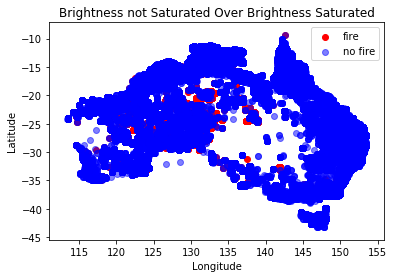

In [7]:
plt.scatter(x=sat['longitude'], y=sat['latitude'], c = "red", label = "fire")
plt.scatter(x=nsat['longitude'], y=nsat['latitude'], label = "no fire", alpha = 0.5,c = "blue")

plt.gca().set(title='Brightness not Saturated Over Brightness Saturated', ylabel='Latitude', xlabel = 'Longitude')
plt.legend();

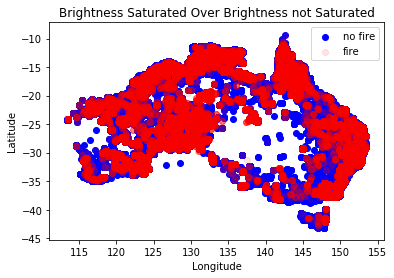

In [8]:
plt.scatter(x=nsat['longitude'], y=nsat['latitude'], c = "blue", label = "no fire")
plt.scatter(x=sat['longitude'], y=sat['latitude'], c = "red", alpha = 0.1, label = "fire")

plt.gca().set(title='Brightness Saturated Over Brightness not Saturated', ylabel='Latitude', xlabel = 'Longitude')
plt.legend();


The order of plotting impacts the visualization and it's interpretation. Since there are many overlapping points, especially in areas of high density, it is difficult to see the points in the class that was plotted first. This is clearly visible in the two plots shown above.

2.3

For better visibility of areas of saturation and no saturation, setting a very low alpha can help. When the markers are not fully opaque, their overlapping can change the visible color and give an idea about the underlying points in the graph. This is visible in the following graph. There are few red points, the rest are above blue points which changes their preceived color. The folowing graph thus gives a better interpretation of the two classes of areas (saturated and not saturated) and we dont have to change the order of plotting for better understanding. 

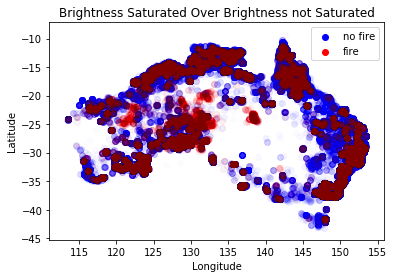

In [9]:
plt.scatter(x=nsat['longitude'], y=nsat['latitude'], c = "b", alpha = 0.01, label = "no fire")
plt.scatter(x=sat['longitude'], y=sat['latitude'], c = "red", alpha = 0.007, label = "fire")

plt.gca().set(title='Brightness Saturated Over Brightness not Saturated', ylabel='Latitude', xlabel = 'Longitude')
leg = plt.legend();
for lh in leg.legendHandles: 
    lh.set_alpha(1)